# Introduction :An interpretation of the data with respect to the Movie.
                                                                 
                                         
In this notebook , the titanic dataset is explored with relevance to the perspectives that were been projected in the famous James Cameron movie Titanic based on the tragic story of the RMS Titanic , in the cold Atlantic Ocean. Now , lets not get deep in the story , which might lead us nowhere near to the solution. But if one may question , how the story has thrown light on this dataset , my answer is , the certain facts that were shown in the movie , which will be supported by the graphs as we go through the notebook ,helped me in Feature selection. 



<img src="https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg">

***Bon Voyage !!***

# Playing with data :

As the title suggests , I have no experience of how things are in Kaggle , thus the "playing" is sort of a , playing with borrowed toys.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

* Loading the datasets

In [3]:
train = pd.read_csv('./kaggle/input/titanic/train.csv')
test = pd.read_csv('./kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Combining the train and test datasets.

In [4]:
combine = [train,test]

* Checking the error or missing value percentages of each feature.

In [5]:
for c in train.columns:
    print(c, str(100*train[c].isnull().sum()/len(train)))


PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.865319865319865
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.10437710437711
Embarked 0.2244668911335578


We see there are missing values in *Age* , *Cabin* and *Embarked* data. As the values of Cabin are in string , we are going to disregard it. According to the movie and common human sentiments , we will use the age values.

* Checking how many people from differnt class and sex had survived.

In [6]:
dependencies_sex = train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean()
dependencies_Pclass = train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()

print(dependencies_Pclass)
print(dependencies_sex)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908


The large difference in the numbers shows that these two features - *Pclass* and *Sex* , have influence on the survival of the boarded passengers. 

# Graphs that support my feature selection based on the movie.

* Starting off with the survivor count


<AxesSubplot:xlabel='Survived', ylabel='count'>

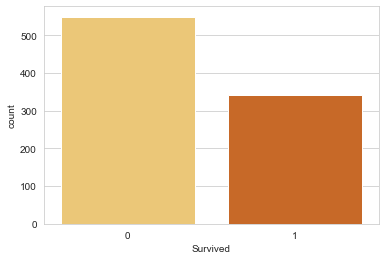

In [7]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=train,palette='YlOrBr')


* Survivor Count based on Sex 

<AxesSubplot:xlabel='Survived', ylabel='count'>

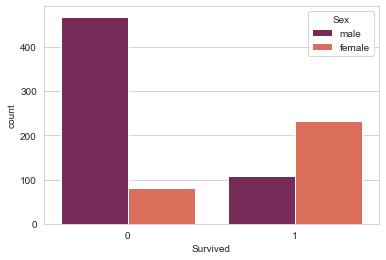

In [8]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Sex',data=train,palette='rocket')


* Survivor Count based on Class of Passenger

<AxesSubplot:xlabel='Survived', ylabel='count'>

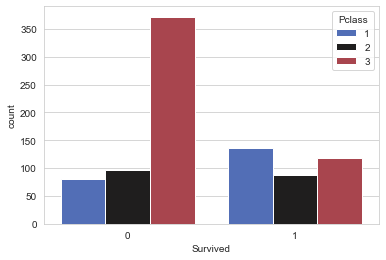

In [9]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Pclass',data=train,palette='icefire')


* Survival Count based on Age

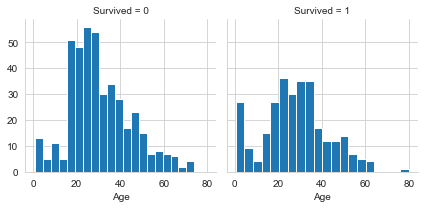

In [10]:
g = sb.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


* Splitting Titles from Names 

In [11]:
for dats in combine:
    dats['Title'] = dats.Name.str.extract('([A-Za-z]+)\.',expand=False)

* Grouping various Titles under Rare Category.

In [12]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


* Label Encoding Titles. 

In [14]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Now we can see that under the Column Title , instead of *Mr.* , *Mrs.* , *Miss* , etc. , there are numbers 1-5 , representing the 5 different Titles.

* Here we see how the survival of the passengers depend on the *Sex* and *Title*. ( There are 2 rows with Title as 5 , which represents the Rare category , and it implies that females of high classes were favoured over all )

In [16]:
title_dependencies=train[['Title','Survived','Sex']].groupby(['Title','Sex'],as_index=False).mean()

title_dependencies

,Title,Sex,Survived
0,1,male,0.156673
1,2,female,0.702703
2,3,female,0.793651
3,4,male,0.575000
4,5,female,1.000000
5,5,male,0.250000


# Selecting the final features !!

<img src="https://64.media.tumblr.com/37e6f5cd93269829406ccb5bbccf34e0/tumblr_pezn7j41oN1qzs7uio4_r1_400.gifv">

According to the movie , the Children and the Women , obviously in the decrasing order of their class , were allowed to board the life boats first. Remember the scene were the crew were shouthing , *" Women and Children First !!"*. Thus the selection of the *Sex* , *Age* and the *Pclass* as a valid feature for the prediction. As we have clearly seen that people of high social stature had a cent percent chance of survival , thus the *Title* column is also a valid feature. 

Now , the *Parch* and *SibSp* feature , which represents parents and children, and siblings and spouse , is also a valid feature , because parents and children were not to be separated , and siblings and spouse too. Thus , those passengers who were travelling alone were left behind. 

The reason behind dropping , *Cabin* , *Embarked* and *Ticket* feature is , that in the data *Ticket* , there are too many mixed data type , and that doesnt help us figure out the survival of the passengers ; in the *Cabin* data , there were too many missing values , although it might have been useful , because the cabin position had an inportant role in the survival as the lower cabins were filled with water first ; the *Embarked* data has nothing to do with the survival , because the port of embarkation did not determine the fate of the passengers, although , upon speculations one may find patterns in the data. 

What we can see is , that the prejudice of people of certain social backgrounds determined the survival of the passengers.  

In [17]:
train = train.drop(['Name', 'PassengerId', 'Cabin', 'Embarked','Ticket'], axis=1)
test = test.drop(['Name', 'PassengerId', 'Cabin', 'Embarked','Ticket'], axis=1)

combine=[train,test]

print(train.head())

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

print(train.head())
print (test.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Title
0         0       3    male  22.0      1      0   7.2500      1
1         1       1  female  38.0      1      0  71.2833      3
2         1       3  female  26.0      0      0   7.9250      2
3         1       1  female  35.0      1      0  53.1000      3
4         0       3    male  35.0      0      0   8.0500      1
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Title
0         0       3    0  22.0      1      0   7.2500      1
1         1       1    1  38.0      1      0  71.2833      3
2         1       3    1  26.0      0      0   7.9250      2
3         1       1    1  35.0      1      0  53.1000      3
4         0       3    0  35.0      0      0   8.0500      1
   Pclass  Sex   Age  SibSp  Parch     Fare  Title
0       3    0  34.5      0      0   7.8292      1
1       3    1  47.0      1      0   7.0000      3
2       2    0  62.0      0      0   9.6875      1
3       3    0  27.0      0      0   8.6625   

# Data Imputation

### Imputation Using Mean Values

In [18]:
train_mean_imputed = train.copy()
train_mean_imputed['Age'] = train['Age'].fillna(train['Age'].mean())

Here , I have replaced the missing values of age with the average of all the ages of the people who boarded the Titanic.


In [19]:
for c in train_mean_imputed.columns:
    print(c, str(100*train_mean_imputed[c].isnull().sum()/len(train)))

Survived 0.0
Pclass 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Title 0.0


Now we can see that there are no missing values in Age column.

### Imputation Using Median Values

In [20]:
train_median_imputed = train.copy()
train_median_imputed['Age'] = train['Age'].fillna(train['Age'].median())

Here , I have replaced the missing values of age with the median of all the ages of the people who boarded the Titanic.

In [21]:
for c in train_median_imputed.columns:
    print(c, str(100*train_median_imputed[c].isnull().sum()/len(train)))

Survived 0.0
Pclass 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Title 0.0


Now we can see that there are no missing values in Age column.

### Imputation Using Most Frequent Values

In [22]:
train_most_frequent_imputed = train.copy()
train_most_frequent_imputed['Age'] = train['Age'].fillna(train['Age'].value_counts().index[0])

Here , I have replaced the missing values of age with the most frequent value of all the ages of the people who boarded the Titanic.

In [23]:
for c in train_most_frequent_imputed.columns:
    print(c, str(100*train_most_frequent_imputed[c].isnull().sum()/len(train)))

Survived 0.0
Pclass 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Title 0.0


Now we can see that there are no missing values in Age column.

### Imputation Using Deep Learning (Datawig)

In [24]:
from sklearn.metrics import r2_score

def get_r2_score(imputed_dataset, column):
    """ 
        Get R2 score for imputed dataset
        param:
            imputed_dataset: Dataset with separate imputed column generated by DataWig
            column: Column that needs imputation
    """
    
    # make a copy of dataset
    imputed_dataset_cpy = imputed_dataset.copy()
    # drop null values
    imputed_dataset_cpy.dropna(how='any', axis=0, inplace=True)
    print('Accuracy(using R2 score): {}'.format(r2_score(imputed_dataset_cpy[column], imputed_dataset_cpy['{}_imputed'.format(column)])))

In [25]:
import datawig

def get_imputed(dataset, input_columns, output_column):
    """ 
        Method for imputation of a column selectively
        
        param:
            dataset: Dataset that need to be imputed
            input_columns: Columns that need to predict the imputatations
            output_column: Column that needs imputation
    """
    
    # df_train, df_test = datawig.utils.random_split(dataset)

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=input_columns, # column(s) containing information about the column we want to impute
        output_column=output_column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    #Fit an imputer model on the train data
    imputer.fit(train_df=dataset, # used whole dataset
                    num_epochs=500,
                   )

    #Impute missing values and return original dataframe with predictions
    imputed_dataset = imputer.predict(dataset)
    
    get_r2_score(imputed_dataset, output_column)
    
    # fill null field of imputation needed column with imputed data
    imputed_dataset[output_column] = imputed_dataset[output_column].fillna(imputed_dataset['{}_imputed'.format(output_column)])
    # remove imputation prediction column
    del imputed_dataset['{}_imputed'.format(output_column)]
    return imputed_dataset

In [26]:
train_datawig_imputed = get_imputed(train, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title'], 'Age')

2021-10-22 15:14:54,928 [INFO]  
========== start: fit model
2021-10-22 15:14:54,929 [WARNING]  Already bound, ignoring bind()
2021-10-22 15:14:54,951 [INFO]  Epoch[0] Batch [0-26]	Speed: 23110.34 samples/sec	cross-entropy=5.648686	Age-accuracy=0.000000
2021-10-22 15:14:54,968 [INFO]  Epoch[0] Train-cross-entropy=3.347303
2021-10-22 15:14:54,969 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2021-10-22 15:14:54,969 [INFO]  Epoch[0] Time cost=0.038
2021-10-22 15:14:54,972 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2021-10-22 15:14:54,976 [INFO]  Epoch[0] Validation-cross-entropy=0.407168
2021-10-22 15:14:54,977 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2021-10-22 15:14:54,997 [INFO]  Epoch[1] Batch [0-26]	Speed: 23110.95 samples/sec	cross-entropy=0.183795	Age-accuracy=0.000000
2021-10-22 15:14:55,015 [INFO]  Epoch[1] Train-cross-entropy=0.152236
2021-10-22 15:14:55,016 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2021-10-22 15:14:55,017 [INFO]  Epoch[1] Time cos

2021-10-22 15:14:55,645 [INFO]  Epoch[14] Time cost=0.034
2021-10-22 15:14:55,648 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2021-10-22 15:14:55,651 [INFO]  Epoch[14] Validation-cross-entropy=0.033105
2021-10-22 15:14:55,651 [INFO]  Epoch[14] Validation-Age-accuracy=0.000000
2021-10-22 15:14:55,669 [INFO]  Epoch[15] Batch [0-26]	Speed: 26000.33 samples/sec	cross-entropy=0.007007	Age-accuracy=0.000000
2021-10-22 15:14:55,686 [INFO]  Epoch[15] Train-cross-entropy=0.006874
2021-10-22 15:14:55,687 [INFO]  Epoch[15] Train-Age-accuracy=0.000000
2021-10-22 15:14:55,688 [INFO]  Epoch[15] Time cost=0.036
2021-10-22 15:14:55,692 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2021-10-22 15:14:55,695 [INFO]  Epoch[15] Validation-cross-entropy=0.032577
2021-10-22 15:14:55,696 [INFO]  Epoch[15] Validation-Age-accuracy=0.000000
2021-10-22 15:14:55,715 [INFO]  Epoch[16] Batch [0-26]	Speed: 24470.99 samples/sec	cross-entropy=0.006455	Age-accuracy=0.000000
2021-10-22 15

2021-10-22 15:14:56,322 [INFO]  Epoch[29] Train-cross-entropy=0.064254
2021-10-22 15:14:56,322 [INFO]  Epoch[29] Train-Age-accuracy=0.000000
2021-10-22 15:14:56,323 [INFO]  Epoch[29] Time cost=0.035
2021-10-22 15:14:56,326 [INFO]  Saved checkpoint to "imputer_model\model-0029.params"
2021-10-22 15:14:56,329 [INFO]  Epoch[29] Validation-cross-entropy=0.191884
2021-10-22 15:14:56,331 [INFO]  Epoch[29] Validation-Age-accuracy=0.000000
2021-10-22 15:14:56,349 [INFO]  Epoch[30] Batch [0-26]	Speed: 27734.02 samples/sec	cross-entropy=0.084488	Age-accuracy=0.000000
2021-10-22 15:14:56,367 [INFO]  Epoch[30] Train-cross-entropy=0.102195
2021-10-22 15:14:56,368 [INFO]  Epoch[30] Train-Age-accuracy=0.000000
2021-10-22 15:14:56,368 [INFO]  Epoch[30] Time cost=0.037
2021-10-22 15:14:56,372 [INFO]  Saved checkpoint to "imputer_model\model-0030.params"
2021-10-22 15:14:56,374 [INFO]  No improvement detected for 5 epochs compared to 0.021828243602067234 last error obtained: 0.16080676317214965, stoppin

Accuracy(using R2 score): 0.9941418333355725


R2 score is moderate

In [27]:
for c in train_datawig_imputed.columns:
    print(c, str(100*train_datawig_imputed[c].isnull().sum()/len(train)))

Survived 0.0
Pclass 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Title 0.0


Now we can see that there are no missing values in Age column.

# Splitting Training data 

In [28]:
from sklearn.model_selection import train_test_split
# for mean imputation
X_mean_train, X_mean_test , Y_mean_train, Y_mean_test = train_test_split(train_mean_imputed.drop(['Survived'],axis=1), train_mean_imputed['Survived'],test_size=0.10,random_state=None)
# for median imputation
X_median_train, X_median_test , Y_median_train, Y_median_test = train_test_split(train_median_imputed.drop(['Survived'],axis=1), train_median_imputed['Survived'],test_size=0.10,random_state=None)
# for most frequent
X_most_frequent_train, X_most_frequent_test , Y_most_frequent_train, Y_most_frequent_test = train_test_split(train_most_frequent_imputed.drop(['Survived'],axis=1), train_most_frequent_imputed['Survived'],test_size=0.10,random_state=None)
# for deep learning based imputation
X_datawig_train, X_datawig_test , Y_datawig_train, Y_datawig_test = train_test_split(train_datawig_imputed.drop(['Survived'],axis=1), train_datawig_imputed['Survived'],test_size=0.10,random_state=None)

# Applying Ramndom Forest :

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

- For mean imputed dataset

In [30]:
rforest_mean_imputed = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
rforest_mean_imputed.fit(X_mean_train, Y_mean_train)
y_pred_mean_forest = rforest_mean_imputed.predict(X_mean_test)

In [31]:
acc_RF_mean_imputed = metrics.accuracy_score(y_pred_mean_forest, Y_mean_test)
print(y_pred_mean_forest)
print("We see that Random Forest classifier gives an Accuracy of ",acc_RF_mean_imputed*100,"% on the traing set.")

[1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0]
We see that Random Forest classifier gives an Accuracy of  81.11111111111111 % on the traing set.


- For median imputed dataset

In [32]:
rforest_median_imputed = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
rforest_median_imputed.fit(X_median_train, Y_median_train)
y_pred_median_forest = rforest_median_imputed.predict(X_median_test)

In [33]:
acc_RF_median_imputed = metrics.accuracy_score(y_pred_median_forest, Y_median_test)
print(y_pred_median_forest)
print("We see that Random Forest classifier gives an Accuracy of ",acc_RF_median_imputed*100,"% on the traing set.")

[0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0]
We see that Random Forest classifier gives an Accuracy of  87.77777777777777 % on the traing set.


- For most frequent imputed dataset

In [34]:
rforest_most_frequent_imputed = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
rforest_most_frequent_imputed.fit(X_most_frequent_train, Y_most_frequent_train)
y_pred_most_frequent_forest = rforest_most_frequent_imputed.predict(X_most_frequent_test)

In [35]:
acc_RF_most_frequent_imputed = metrics.accuracy_score(y_pred_most_frequent_forest, Y_most_frequent_test)
print(y_pred_most_frequent_forest)
print("We see that Random Forest classifier gives an Accuracy of ",acc_RF_most_frequent_imputed*100,"% on the traing set.")

[1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0]
We see that Random Forest classifier gives an Accuracy of  86.66666666666667 % on the traing set.


- For Datwig imputed dataset

In [36]:
rforest_datawig_imputed = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
rforest_datawig_imputed.fit(X_datawig_train, Y_datawig_train)
y_pred_datawig_forest = rforest_datawig_imputed.predict(X_datawig_test)

In [37]:
acc_RF_datawig_imputed = metrics.accuracy_score(y_pred_datawig_forest, Y_datawig_test)
print(y_pred_datawig_forest)
print("We see that Random Forest classifier gives an Accuracy of ",acc_RF_datawig_imputed*100,"% on the traing set.")

[1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1]
We see that Random Forest classifier gives an Accuracy of  80.0 % on the traing set.


# Getting the best Imputation Method:

In [38]:
models = pd.DataFrame({
    'Imputation_Method': ['Mean Imputation', 'Median Imputation', 'Most Frequent Imputation', 'Deep Learning(Datawig) Imputation'],
    'Score': [acc_RF_mean_imputed, acc_RF_median_imputed, acc_RF_most_frequent_imputed, acc_RF_datawig_imputed]})
best_model=models.sort_values(by='Score', ascending=False)
print(best_model)

                   Imputation_Method     Score
1                  Median Imputation  0.877778
2           Most Frequent Imputation  0.866667
0                    Mean Imputation  0.811111
3  Deep Learning(Datawig) Imputation  0.800000


## Conclusion

For the given dataset it seems the Median data imputation techniques works well. But we only did the imputation for age column only we dropped the rest of the columns. There is no perfect way to impute a dataset. Each strategy can perform better for certain datasets and missing data types but may perform much worse on other types of datasets. It's entirely depends on the dataset. So what imputation technique that need to be used can only be decided after a through EDA(Exploratory Data Analysis).